In [1]:
# Importing some libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Reading and checking the dataset
customerdata = pd.read_csv("in\CreditCardCustomerData.csv")
customerdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# Data type and general information
# There's no any missing value for this dataset
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# Lets see the correlation among them
customer_cor = customerdata.iloc[:,2:].corr()
print(customer_cor)

                     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit             1.000000            0.608860          -0.100312   
Total_Credit_Cards           0.608860            1.000000           0.315796   
Total_visits_bank           -0.100312            0.315796           1.000000   
Total_visits_online          0.551385            0.167758          -0.551861   
Total_calls_made            -0.414352           -0.651251          -0.506016   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                0.551385         -0.414352  
Total_Credit_Cards              0.167758         -0.651251  
Total_visits_bank              -0.551861         -0.506016  
Total_visits_online             1.000000          0.127299  
Total_calls_made                0.127299          1.000000  


In [14]:
customerdata.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

[Text(0.5, 0, 'Avg_Credit_Limit'),
 Text(1.5, 0, 'Total_Credit_Cards'),
 Text(2.5, 0, 'Total_visits_bank'),
 Text(3.5, 0, 'Total_visits_online'),
 Text(4.5, 0, 'Total_calls_made')]

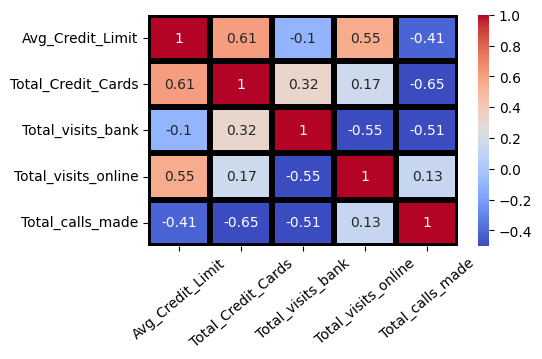

In [21]:
# Heatmap to see the correlation better
fig = plt.subplots(figsize=(5,3)) # width and height
sns.heatmap(customer_cor, annot=True, cmap="coolwarm", linewidths=3, 
            linecolor="black", vmin=-0.5, vmax=1, cbar=True
).set_xticklabels(['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], rotation=40)

In this case the correlation among the variables shows a strong correlation between visit online, credit limit and total cards.So, this might seem that as long as a person gets more credit cards and increases their Credit limit They use more the online bank options. But, let's continue with the analysis.

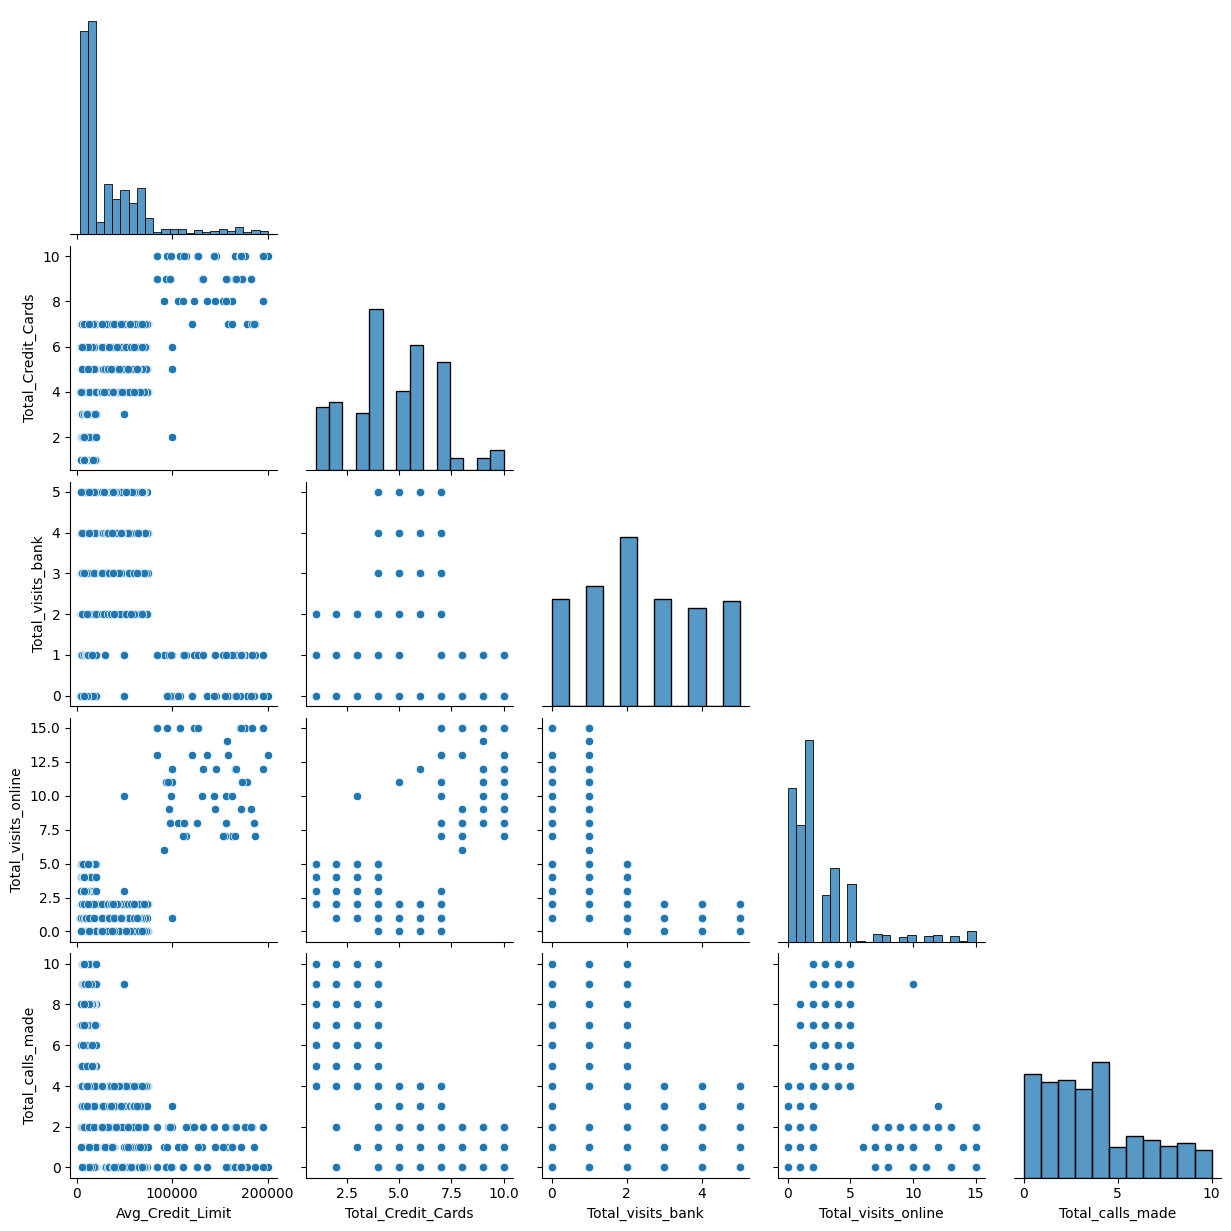

In [22]:
# Let's continue with the correlation analisys using pairplot
# In this case is necessary to plot the behavior in the points because,
# I need to see the possible clusters for the clustering analysis.

sns.pairplot(data=customerdata.iloc[:,2:], corner=True)

It's possible to see different kind of groups, but I'll show you this deeper than.

In [23]:
# Outliers in the data
def detect_outliers(Datos,x): # function to detect outliers
    Q3 = Datos[x].quantile(0.75)
    Q1 = Datos[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = Datos[Datos[x] > superior].index
    out_inf = Datos[Datos[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
    size2 = len(Datos[x])
    percentage = round((size/size2)*100,3)

    return f'There are {size} outliers in variable {x} ({percentage}%), and correspond to the indixes: {outliers}'

In [24]:
# Find outliers 
outlier_AVG = detect_outliers(customerdata,"Avg_Credit_Limit")
print(outlier_AVG)

There are 39 outliers in variable Avg_Credit_Limit (5.909%), and correspond to the indixes: [612, 614, 615, 617, 618, 619, 620, 621, 622, 623, 624, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 644, 645, 646, 647, 648, 649, 650, 651, 652, 654, 657, 658, 659]


In [25]:
outlier_cards = detect_outliers(customerdata,'Total_Credit_Cards')
print(outlier_cards)

There are 0 outliers in variable Total_Credit_Cards (0.0%), and correspond to the indixes: []


In [26]:
outlier_visit_bank = detect_outliers(customerdata, "Total_visits_bank")
print(outlier_visit_bank)

There are 0 outliers in variable Total_visits_bank (0.0%), and correspond to the indixes: []


In [27]:
# , , 'Total_calls_made'
outlier_visit_online = detect_outliers(customerdata, 'Total_visits_online')
print(outlier_visit_online)

There are 37 outliers in variable Total_visits_online (5.606%), and correspond to the indixes: [1, 4, 6, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 624, 626, 627, 628, 630, 631, 633, 637, 639, 640, 641, 642, 644, 645, 647, 650, 651, 653, 654, 655, 656, 657, 658, 659]


In [28]:
outlier_calls = detect_outliers(customerdata, 'Total_calls_made')
print(outlier_calls)

There are 0 outliers in variable Total_calls_made (0.0%), and correspond to the indixes: []


The outliers are present in the online visit and average credit card, these don't represent a long amount of data.
And they might be for the top clients who use just online visits and have a high credit limit (As we looked at heatmap).

Finally, next step is on Clustering_processing.ipynb (Where the clustering model/analysis is built).